In [1]:
""""
Things to remember: remove Y from dataset
Y is what we are trying to discover
BE careful not to do classification, this is regression.  look for $$ amounts
"""


'"\nThings to remember: remove Y from dataset\nY is what we are trying to discover\nBE careful not to do classification, this is regression.  look for $$ amounts\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df_dirty = pd.read_csv(r"C:\Users\marce\Documents\Graduate School\Data 602\Linear Regression HW\Kickstarter\Kickstarter_2.csv")
df = df_dirty.dropna()

In [4]:
#Checking for NaN values, this data looks clean.  
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [5]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [8]:
df.drop(['ID','deadline', 'currency','country','launched','usd pledged',
        'usd_pledged_real', 'usd_goal_real'], axis=1, inplace=True)

df = df[df.main_category == "Technology"]


df['pledge_goal_ratio'] = df['pledged'] / df['goal']

df = df[df.backers >=1000]
df = df[df.backers<=10000]
df = df[df.pledged<=1000000]
df = df[df.goal<=100000]
#df = df[df.state == "successful"]

In [11]:
df.category.value_counts()

Hardware             189
Gadgets              189
Technology           189
Wearables             89
DIY Electronics       49
Camera Equipment      33
Software              32
Sound                 30
3D Printing           25
Apps                  19
Robots                17
Web                   11
Space Exploration      8
Flight                 4
Fabrication Tools      4
Name: category, dtype: int64

In [12]:
"""
Checking the stats for features.  

In particular, pledge_goal_ratio seems to have a very wide spread between
mean, max, and the 75th quartile.  I will remove the outliers to better
frame the data
"""
df.describe()

,goal,pledged,backers,pledge_goal_ratio
count,888.000000,888.000000,888.000000,888.000000
mean,39659.387387,212798.931295,2336.085586,10.860468
std,29753.927568,185258.747864,1678.815460,32.956986
min,108.000000,7177.390000,1000.000000,0.381944
25%,15000.000000,85110.500000,1252.500000,2.602341
50%,30000.000000,148076.500000,1674.000000,5.187971
75%,50000.000000,281403.127500,2762.750000,10.774992
max,100000.000000,929212.760000,9830.000000,805.037037


In [13]:
"""
A closer look at the pledge_goal_ratio values.  We  see the highest value is
near equal the next four in line.  Will remove ratios over 100
"""

df.sort_values(by='pledge_goal_ratio', ascending=False).head(10)

,name,category,main_category,goal,pledged,state,backers,pledge_goal_ratio
359608,YOGA : TIME | The best way to practice yoga,Apps,Technology,108.0,86944.00,successful,1620,805.037037
132757,"2015 CES Best, First Domestic Robot That Track...",Robots,Technology,1000.0,365538.00,successful,1627,365.538000
370072,Hello Coding: Anyone Can Learn to Code,Technology,Technology,500.0,109343.00,successful,1367,218.686000
132461,Nope - Live Free,Technology,Technology,500.0,93034.00,successful,7857,186.068000
46618,DM1: Titanium & Carbon Fiber Wallet by Decaden...,Gadgets,Technology,5000.0,519070.51,successful,4013,103.814102
374750,Nope 2.0 - Live Free,Gadgets,Technology,964.0,87529.00,successful,5768,90.797718
202199,It prevents you from leaving your phone and wa...,Hardware,Technology,1000.0,85765.15,successful,1590,85.765150
55866,"GoPro Hero 4, 3/3+ Extended Battery Pack- Lime...",Camera Equipment,Technology,1000.0,84812.00,successful,1522,84.812000
24768,"Foxshot - Small Camera, Water-resistant Polych...",Gadgets,Technology,2500.0,205281.90,successful,3719,82.112760
114691,anonabox : a Tor hardware router (Suspended),Gadgets,Technology,7500.0,585549.35,suspended,8928,78.073247


In [14]:
df = df[df.pledge_goal_ratio <= 100]

In [15]:
df.describe()

,goal,pledged,backers,pledge_goal_ratio
count,883.000000,883.000000,883.000000,883.000000
mean,39875.909400,212674.429762,2330.645527,9.020332
std,29697.822229,185300.275475,1671.647781,11.731815
min,500.000000,7177.390000,1000.000000,0.381944
25%,15000.000000,84790.215000,1251.000000,2.578187
50%,30000.000000,148353.000000,1674.000000,5.161187
75%,50000.000000,280913.250000,2757.000000,10.600207
max,100000.000000,929212.760000,9830.000000,90.797718


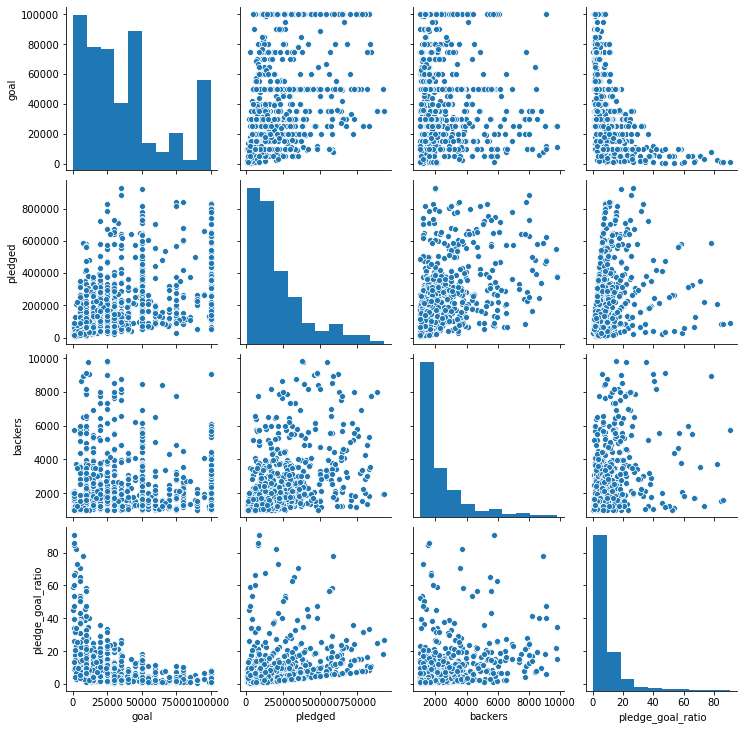

In [16]:
#df_plots = df[['goal','pledged','backers','pledge_goal_ratio']]

sns.pairplot(df)
plt.show()

<AxesSubplot:>

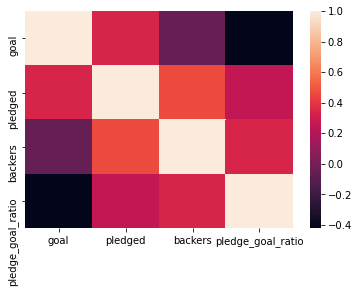

In [17]:
sns.heatmap(df.corr())

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.2)

print(X_train.shape, X_test.shape)

(706, 8) (177, 8)


In [ ]:
sns,lmplot(x='goal','')

In [19]:
X_train.describe()

,goal,pledged,backers,pledge_goal_ratio
count,706.000000,706.000000,706.000000,706.000000
mean,40040.597734,215936.845382,2355.498584,8.997067
std,29685.111019,188936.647443,1690.070718,11.491748
min,500.000000,7326.880000,1000.000000,0.381944
25%,15000.000000,84224.225000,1251.000000,2.656233
50%,32500.000000,150649.250000,1697.500000,5.206618
75%,50000.000000,289024.225000,2777.750000,10.406996
max,100000.000000,920122.000000,9830.000000,90.797718


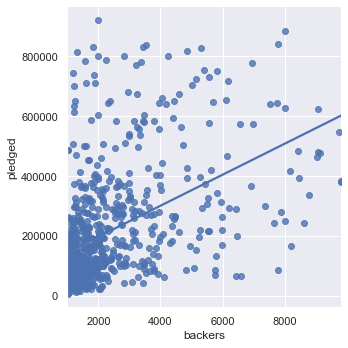

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lmplot(x='backers', y='pledged', data=X_train, ci=0)
plt.draw()

In [21]:
""" 
    Least squares function from the class lecture
    Good to see and understand the process


def least_square(X, y):
    x_bar = X.mean()
    y_bar = y.mean()
    b1_num = (X - x_bar).dot(y-y_bar)
    b1_denom = ((X-x_bar)**2).sum()
    b1 = b1_num / b1_denom
    b0 = y_bar -b1*x_bar
    MSE = ((y -(b0 + b1*X))*2).mean()
    
    return b0, b1, MSE

least_square(X_train.temp, X_train.cnt)

"""

' \n    Least squares function from the class lecture\n    Good to see and understand the process\n\n\ndef least_square(X, y):\n    x_bar = X.mean()\n    y_bar = y.mean()\n    b1_num = (X - x_bar).dot(y-y_bar)\n    b1_denom = ((X-x_bar)**2).sum()\n    b1 = b1_num / b1_denom\n    b0 = y_bar -b1*x_bar\n    MSE = ((y -(b0 + b1*X))*2).mean()\n    \n    return b0, b1, MSE\n\nleast_square(X_train.temp, X_train.cnt)\n\n'

In [22]:
"""
##numpy to solve directly

X = np.array(X_train.backers)

ones = np.ones(shape=X.shape)

X = np.c_[ones, X]
X_Trans = X.T

np.linalg.inv( X_Trans.dot(X)).dot(X_Trans).dot(X_train.pledged)
"""

'\n##numpy to solve directly\n\nX = np.array(X_train.backers)\n\nones = np.ones(shape=X.shape)\n\nX = np.c_[ones, X]\nX_Trans = X.T\n\nnp.linalg.inv( X_Trans.dot(X)).dot(X_Trans).dot(X_train.pledged)\n'

In [24]:
#Scikitlearn method for solving, super easy

from sklearn.linear_model import LinearRegression

LineR = LinearRegression()

LineR.fit(X_train[["backers"]] , X_train.pledged)

print(LineR.intercept_, LineR.coef_)

94114.40079448595 [51.7183264]


In [25]:
import statsmodels.api as sm

X = X_train[['backers', 'pledged']]
y = X_train.goal
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   goal   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     84.91
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           9.33e-34
Time:                        10:31:05   Log-Likelihood:                -8195.6
No. Observations:                 706   AIC:                         1.640e+04
Df Residuals:                     703   BIC:                         1.641e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.39e+04   1813.298     18.694      0.0

In [26]:
Xtest = X_test[['backers',  'goal']]
ytest = X_test.pledged
Xtest = sm.add_constant(Xtest)

res.predict(Xtest)

2441      20479.588203
256288     9468.463374
14549     29011.943687
240365    28953.190535
711       33018.971086
              ...     
175284    33155.264535
144096    29843.641068
234964    23983.022764
94667     30728.855564
20862     37146.276478
Length: 177, dtype: float64

In [27]:
X_test

,name,category,main_category,goal,pledged,state,backers,pledge_goal_ratio
2441,IllumiBowl Clip-On Toilet Night Light (Motion ...,Gadgets,Technology,20000.0,95399.00,successful,3297,4.769950
256288,Spark Core: Wi-Fi for Everything (Arduino Comp...,DIY Electronics,Technology,10000.0,567968.41,successful,5549,56.796841
14549,nexpaq: the first truly modular smartphone case,Hardware,Technology,50000.0,279758.00,successful,1934,5.595160
240365,AQUA+ | World's Most Powerful Wireless Headpho...,Sound,Technology,15000.0,151772.00,successful,1346,10.118133
711,CONDUIT Sports - Dynamic Bone Conducting Headp...,Wearables,Technology,50000.0,106213.00,successful,1052,2.124260
...,...,...,...,...,...,...,...,...
175284,"The First Magnetic, Dime-Sized iPhone Storage ...",Gadgets,Technology,50000.0,112791.00,successful,1022,2.255820
144096,Light Pulse Electroluminescent Charge & Sync C...,Gadgets,Technology,15000.0,46134.00,successful,1150,3.075600
234964,LIGHTORS: The world's first MONSTER Batteries!,Hardware,Technology,15000.0,69170.00,successful,2440,4.611333
94667,Mogees - Transform anything into a musical ins...,Sound,Technology,20000.0,102606.00,successful,1041,5.130300


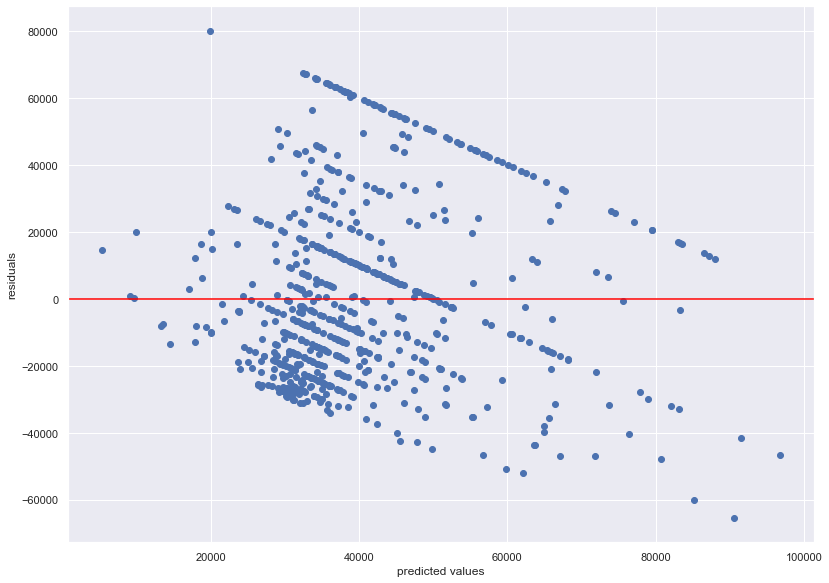

In [28]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', label='0')

plt.xlabel('predicted values')
plt.ylabel('residuals')

plt.tight_layout()

In [29]:
"""
class Preceptron(object):
    """
    Parameters:
    - eta :        float    | Learning rate
    - n_iter :     int      | passes over the training set
    - rand_state : int      | RNG for weight initialization
    
    Attributes:
    - w_ :         1d-array | weights after fitting
    - errors_ : list     | count of updates in each epoch
    """
    
    def __init__(self, eta=0.01, n_iter=50, rand_state=1):
        self.eta = eta
        self.n_ter = n_iter
        self.rand_state = rand_state
        
    def fit(self, X, y):
        """
        Fitting training Data
        Parameters:
        - X : array, shape = [n_examples, n_features](number of examples and features)
        - y : array, shape = [n_examples] (target values)
        
        returns: self:object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size =1 + X.shape[1])
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors =0
            for xi, target in zip(X, y):
                update = self.eta * (target -self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        #Calculate net input
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        #return class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    """

IndentationError: unexpected indent (<ipython-input-29-da9ece700023>, line 4)